<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

Going into this week's assignment, I wanted to follow up on assignment 7 where I looked at the leading causes of death in the US. In that assignment, heart disease was the leading cause of death from 2007 to 2019. However, I could not find a dataset that had the type of data I wanted to analyze so I ended up using a  dataset from Kaggle (https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data). The sources of the data was not listed but I think it is appropriate given the purpose of this assignment. The dataset is titled "Cardiovascular Disease dataset".  I decided to choose this dataset as I wanted to explore the common characteristics in people who have heart (cardiovascular) disease. The dataset looks at 12 features and the data was collected during the medical examination.



______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
# importing all the important libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20602/Week%2010/cardio_train.csv", delimiter=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


From the data description:

Features:

*   Age | Objective Feature | age | int (days)
*   Height | Objective Feature | height | int (cm) |
*   Weight | Objective Feature | weight | float (kg) |
*   Gender | Objective Feature | gender | categorical code |
*   Systolic blood pressure | Examination Feature | ap_hi | int |
*   Diastolic blood pressure | Examination Feature | ap_lo | int |
*   Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
*   Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
*   Smoking | Subjective Feature | smoke | binary |
*   Alcohol intake | Subjective Feature | alco | binary |
*   Physical activity | Subjective Feature | active | binary |
*   Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Cleaning up the data frame

In [4]:
#df.set_index('id', inplace=True)

In [5]:
df.rename(columns={"ap_hi":"systolic", "ap_lo":"diastolic"}, inplace=True)

In [6]:
# converting age from days to years
df["age"] = (df["age"]/365).round().astype("int")

In [7]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int32  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   systolic     70000 non-null  int64  
 6   diastolic    70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.7 MB


In [9]:
df.describe()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
systolic       0
diastolic      0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

Aside from converting the age column from days to years, I also want to create a new column called BMI (body mass index). This is calculated by taking the individual's weight(kg) and dividing it by their height(m) squared.

In [11]:
# converting height from cm to m
df["height"] = df["height"]/100

In [12]:
df["bmi"] = (df["weight"]/df["height"]**2).round(2)

In [13]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93
2,2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71
4,4,48,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01


For this analysis, I just want to look at the people who have cardiovascular disease

In [14]:
df_filtered = df[df["cardio"] == 1]

In [15]:
df_filtered.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93
2,2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71
7,12,62,2,1.78,95.0,130,90,3,3,0,0,1,1,29.98
15,24,46,2,1.72,112.0,120,80,1,1,0,0,0,1,37.86


In [16]:
df.describe()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556545
std,28851.302323,6.765294,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091405
min,0.000000,30.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.470000
25%,25006.750000,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.880000
50%,50001.500000,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.375000
75%,74889.250000,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.220000
max,99999.000000,65.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.670000


Some of this data does not look accurate such as someone having a max bmi of 298 and a min bmi of 3.

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



### Part 1

###### A histogram of the age of the individuals

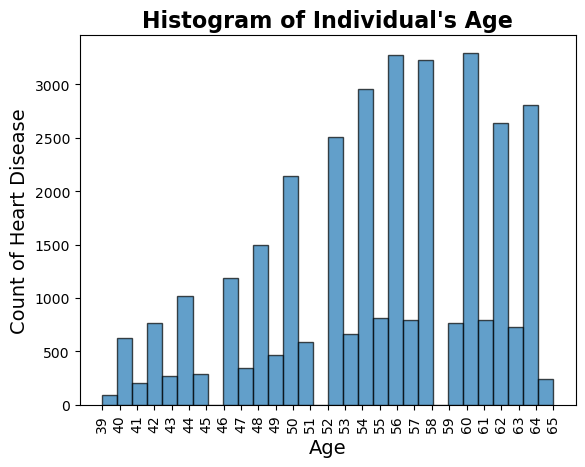

In [17]:
ages = df_filtered["age"]
plt.hist(ages, bins = 30, edgecolor="k", alpha=0.7)
plt.title("Histogram of Individual's Age", fontdict={"family" : "sans-serif","weight" : "bold","size": 16})
plt.xlabel("Age", fontdict = {"size" : 14})
plt.ylabel("Count of Heart Disease",  fontdict = {"size" : 14})
plt.xticks(range(min(ages), max(ages) + 1))
plt.xticks(rotation=90)
plt.show()

The histogram illustrates the distribution of ages among individuals with heart disease. The distribution peaks at about age 56. There is a higher concentration of individuals aged >50 with heart disease than individuals aged <50. This indicates that there is a positive correlation between age and heart disease. The different heights of the bins can be attributed to the rounding I did earlier. Further analysis is needed to explore the strength and significance of the age-heart disease relationship.

I added labels to the x and y axis as well as a titlte. The x axis was also changed so that it goes by intervals of 1. The font size and style of the labels and title were also changed.

##### A boxplot of the individual's BMI grouped by cardiovascular disease

In [18]:
# For some odd reason there were a bunch of BMIs above 50, which is extremely rare so we're gonna exclude them
df_no_outlier = df[df["bmi"] < 50]
grouped_data = df_no_outlier[df_no_outlier["cardio"] == 0]["bmi"], df_no_outlier[df_no_outlier["cardio"] == 1]["bmi"]

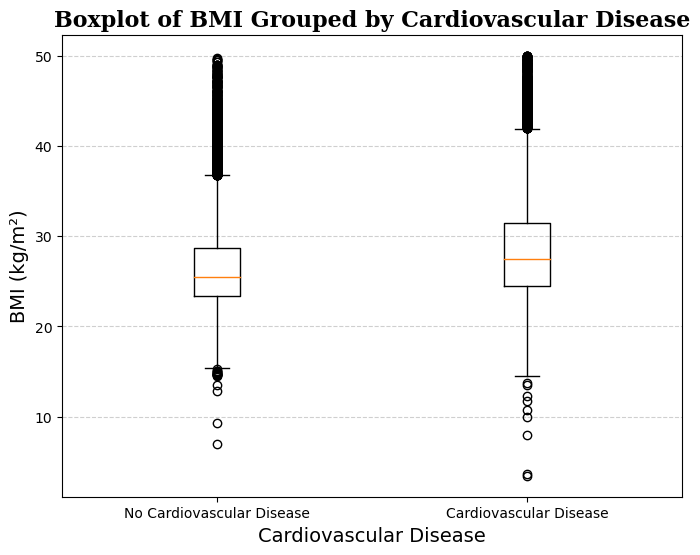

In [19]:
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_data, labels=["No Cardiovascular Disease", "Cardiovascular Disease"])
plt.title("Boxplot of BMI Grouped by Cardiovascular Disease", fontdict={"family" : "serif","weight" : "bold","size": 16})
plt.xlabel("Cardiovascular Disease", fontdict= {"size": 14})
plt.ylabel("BMI (kg/m²)", fontdict= {"size": 14})
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

This is a boxplot that shows the BMIs among individuals based on their cardiovascular disease status. Individuals with cardiovascular disease have a slightly higher median BMI when compared to those without heart disease.

Also, the interquartile range of BMIs in individuals with cardiovascular disease is wider than that of those with no cardiovascular disease. This suggests that even individuals with lower BMIs can have cardiovascular disease, indicating that an elevated BMI does not accout for all cases of cardiovascular disease.

I added the labels to the x and y axis as well as a title to the plot. I also added some gridlines to the boxplot to make the values like the median more readable. The font size of the labels and fonts were enlarged too.

### Part 2

##### Histogram of individual's ages in seaborn

D:\Users\Jian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\Jian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count of Heart Disease')

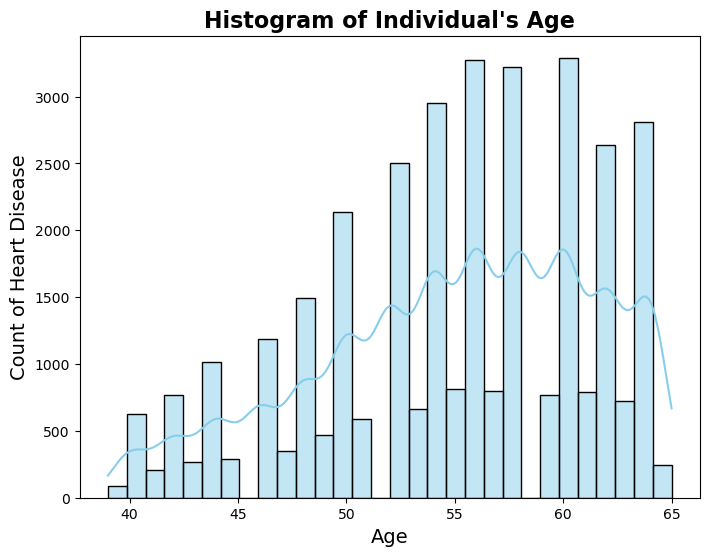

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(ages, bins=30, kde=True, color='skyblue')
plt.title("Histogram of Individual's Age", fontdict={"family": "sans-serif", "weight": "bold", "size": 16})
plt.xlabel("Age", fontdict={"size": 14})
plt.ylabel("Count of Heart Disease", fontdict={"size": 14})

This histogram in seaborn of the individual's ages is pretty much the same as the one done in matplotlib but I was able to add in a kernel denstiy estimation(kde) line. Again, the count of individuals with heart disease increases with age. However, the kde shows that a greater distribution of the individuals with heart disease is between 55 to 64 years old, suggesting a positive correlation between age and cardiovascular disease.

##### Boxplot of BMI grouped by cardiovascular disease in seaborn

D:\Users\Jian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\Jian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\Jian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


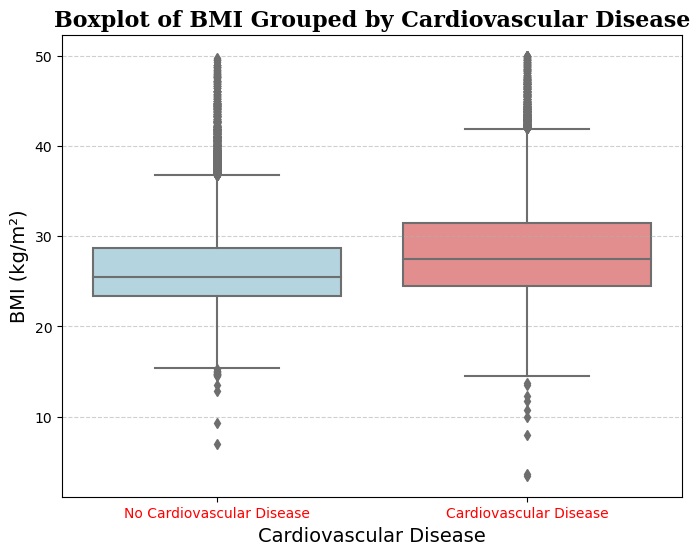

In [21]:
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x="cardio", y="bmi", data=df_no_outlier, palette=["lightblue", "lightcoral"])
plt.title("Boxplot of BMI Grouped by Cardiovascular Disease", fontdict={"family": "serif", "weight": "bold", "size": 16})
plt.xlabel("Cardiovascular Disease", fontdict={"size": 14})
plt.ylabel("BMI (kg/m²)", fontdict={"size": 14})
plt.grid(axis="y", linestyle="--", alpha=0.6)
boxplot.set_xticklabels(["No Cardiovascular Disease", "Cardiovascular Disease"])
boxplot.tick_params(axis= "x", labelcolor="red")
plt.show()

The boxplot of BMIs grouped by cardiovascular disease done in seaborn is very similar to that of the one done in matplotlib. However, this boxplot figure is a bit larger in size so the median and interquartile range is easier to see. Again, the boxplot shows that the median BMI in cariovascular disease is higher in those with cardiovascular disease compared to those without.

I added the labels to the x and y axis as well as a title to the plot. I also added some gridlines to the boxplot to make the values like the median and interquartile clearer. The font size of the labels and fonts were colored and enlarged.

##### Correlation Heatmap

I decided to do a correlation heatmap in seaborn. I was having trouble doing this in matplotlib as the plots were coming out very different than how I intended. This was the plot I was aiming for when I looked through stackoverflow.

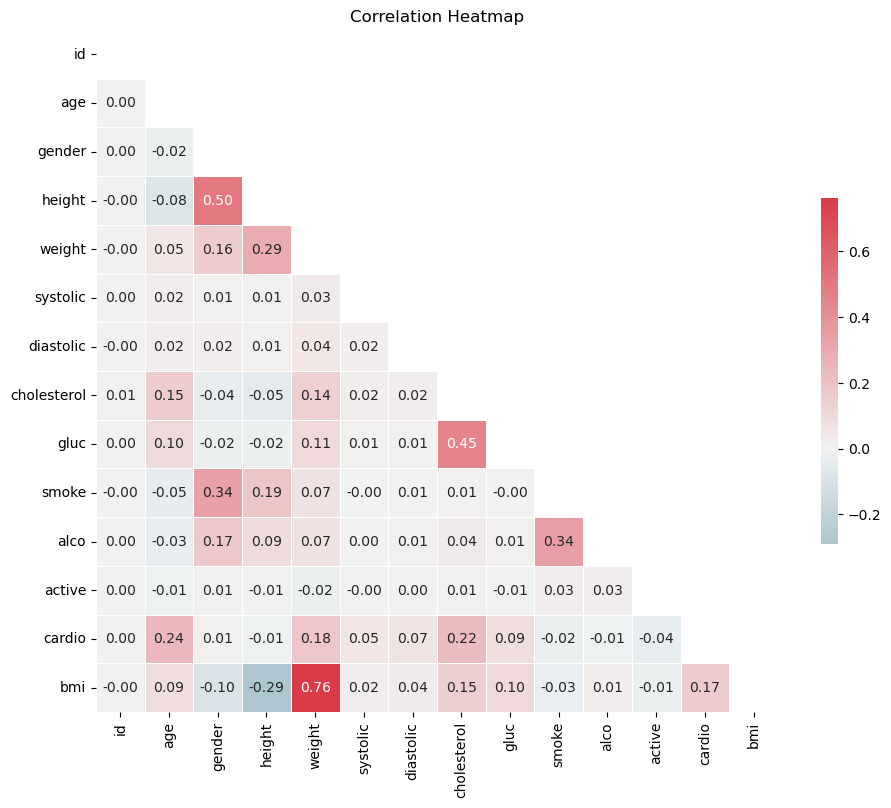

In [22]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(corr)
plt.figure(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heatmap')
plt.show()

This correlation heatmap shows that age (0.24) and cholesterol (0.22) had the biggest influence on whether the individual had cardiovascular disease. On the other hand, this heatmap also indicates that height, smoking, alcohol, and physical activity had a negative correlation to cardiovascular disease.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

In summary, this dataset provides a valuable resource for examining the relationship between cardiovascular disease and its risk factors. It covers a range of demographic and health-related variables, which can be used to train models that predict cardiovascular disease.

The histogram showed that a positive correlation between age and cardiovascular disease as their was a higher concenration of individuals with cardiovascular disease over 50 years old than those younger than 50 years old. More stastical tests need to be done to determine if this correlation is statistical significant.

The boxplot showed that individuals with cardiovascular disease had a higher median BMI than those without. It also showed that individuals with cardiovascular disease had a wider range of BMI than those without. The 25% percentile of BMIs for those with cardiovascular disease was less than those without cardiovascular disease. This suggests there are additional risk factors that influence heart disease.

Lastly, the correlation heatmap revealed age and cholesterol exhibiting the highest impact to whether the individual had cardiovascular disease or not. However, correlation does not imply causation and further research should be done to investigate the strength of these relationships.